In [18]:
import pandas as pd

nea_heizen = pd.read_pickle('Data/Serialization/oesterreich/Nutzenenergieanalyse/Wohngebäude/Heizen.pkl')
nea_kochen = pd.read_pickle('Data/Serialization/oesterreich/Nutzenenergieanalyse/Wohngebäude/Kochen.pkl')
nea_strom = pd.read_pickle('Data/Serialization/oesterreich/Nutzenenergieanalyse/Wohngebäude/Strom.pkl')
nea_wuk = pd.read_pickle('Data/Serialization/oesterreich/Nutzenenergieanalyse/Wohngebäude/Warmwasser und Kochen.pkl')
nea_warmwasser = pd.read_pickle('Data/Serialization/oesterreich/Nutzenenergieanalyse/Wohngebäude/Warmwasser.pkl')

nea_sum = sum([nea_heizen.fillna(0), nea_kochen.fillna(0), nea_strom.fillna(0), nea_wuk.fillna(0), nea_warmwasser.fillna(0)])
nea_sum.head()

,Braunkohle,Braunkohlen-Briketts,Brenntorf,Koks,Steinkohle,Benzin,Diesel,Heiz-Gasöl,Petroleum,Heizöl,Flüssiggas,Erdgas,Brennbare Abfälle,Scheitholz,Biogene,Erneuerbare,Fernwärme,Elektrische Energie
1993,1438.0000,3327.1606,4.0,12128.5320,3899.712,0.0,0.0,62844.7888,0.0,10093.959500,1010.8045,42837.359246,0.0,61364.0,1268.825508,1775.751243,13760.9172,45300.8520
1994,1175.0000,2879.5587,4.0,10685.4675,3780.484,0.0,0.0,60878.2048,0.0,7194.914600,1021.2131,40810.116561,0.0,56812.0,1226.933774,1982.108311,13378.1724,44674.1472
1995,1084.0000,2812.3608,4.0,9825.9210,3830.556,0.0,0.0,66513.9997,0.0,7846.356064,1207.9359,44293.425839,0.0,61250.0,1396.621981,2207.439692,15100.5276,46781.6952
1996,894.6406,2740.2636,4.0,9029.7612,3974.988,0.0,0.0,73619.5832,0.0,8820.158000,1454.4084,48463.077028,0.0,67202.0,1580.156243,2435.287361,17460.9000,48865.3676
1997,610.0000,2078.7164,4.0,6687.8502,3192.796,0.0,0.0,57236.3676,0.0,9138.855900,1666.6862,49725.729971,0.0,62145.0,2090.638525,2659.107072,17062.7436,47633.9588


In [19]:
eb_gesamt = pd.read_pickle('Data/Serialization/oesterreich/Energiebilanz/Wohngebäude.pkl')['1993':]

In [20]:
(nea_sum - eb_gesamt).head()

,Ablaugen,Benzin,Biodiesel,Bioethanol,Biogas,Biogene,Braunkohle,Braunkohlen-Briketts,Brennbare Abfälle,Brenntorf,...,Koks,Mischgas,Pellets+Holzbriketts,Petroleum,Scheitholz,Solarwärme,Sonst. Biogene fest,Sonst. Biogene flüssig,Steinkohle,Umgebungswärme
1993,NaN,0.0,NaN,NaN,NaN,2.273737e-13,0.000000e+00,0.000000e+00,0.0,0.0,...,1.818989e-12,NaN,NaN,0.0,7.275958e-12,NaN,NaN,NaN,0.000000e+00,NaN
1994,NaN,0.0,NaN,NaN,NaN,-2.273737e-13,-2.273737e-13,-4.547474e-13,0.0,0.0,...,-1.818989e-12,NaN,NaN,0.0,7.275958e-12,NaN,NaN,NaN,4.547474e-13,NaN
1995,NaN,0.0,NaN,NaN,NaN,0.000000e+00,2.273737e-13,0.000000e+00,0.0,0.0,...,-1.818989e-12,NaN,NaN,0.0,-1.455192e-11,NaN,NaN,NaN,0.000000e+00,NaN
1996,NaN,0.0,NaN,NaN,NaN,2.273737e-13,1.136868e-13,0.000000e+00,0.0,0.0,...,-1.818989e-12,NaN,NaN,0.0,0.000000e+00,NaN,NaN,NaN,4.547474e-13,NaN
1997,NaN,0.0,NaN,NaN,NaN,4.547474e-13,1.136868e-13,0.000000e+00,0.0,0.0,...,9.094947e-13,NaN,NaN,0.0,1.455192e-11,NaN,NaN,NaN,9.094947e-13,NaN


In [21]:
new_nea_sum = pd.DataFrame(
    data=nea_sum,
    index=pd.PeriodIndex(pd.period_range(start='1988', end=nea_sum.index[-1], freq='A'), name=nea_sum.index.name),
    copy=True
)

In [71]:
import pathlib

from Domain.Nutzenergieanalyse import NEAData

import Bevoelkerung
import Domain.General
import Energiebilanz
import General
import Nutzenergieanalyse
import Processor
import Utils


def create_general_data(g_laender_factory: Domain.General.GLaenderFactory):
    g_sektoren_factory = General.GSektorenDefaultFactory()
    g_bereiche_factory = General.GBereicheDefaultFactory()
    g_energietraeger_klassen_factory = General.GEnergietraegerKlassenDefaultFactory()
    g_energietraeger_klassen = g_energietraeger_klassen_factory.create()
    g_energietraeger_factory = General.GEnergietraegerDefaultFactory(g_energietraeger_klassen)
    g_data_factory = General.GDataFactory(g_laender_factory, g_sektoren_factory, g_bereiche_factory,
                                          g_energietraeger_factory)
    g_data = g_data_factory.create()
    return g_data

def create_nea_data(g_data: Domain.General.GData):
    nea_data_factory = Nutzenergieanalyse.NEADataPickleFactory(pathlib.Path('Data/Serialization'))
    nea_data = nea_data_factory.create(g_data)
    return nea_data

def create_eb_data(g_data: Domain.General.GData):
    eb_laender_factory = Energiebilanz.EBLaenderDefaultFactory()
    eb_laender = eb_laender_factory.create(g_data.laender)
    eb_sektoren_factory = Energiebilanz.EBSektorenDefaultFactory(g_data.sektoren)
    eb_sektoren = eb_sektoren_factory.create()
    eb_data_factory = Energiebilanz.EBDataPickleFactory(pathlib.Path('Data/Serialization'))
    eb_energietraeger_factory = Energiebilanz.EBEnergietraegerDefaultFactory()
    eb_energietraeger = eb_energietraeger_factory.create(g_data)
    eb_data = eb_data_factory.create(eb_energietraeger, g_data)
    return eb_data

laender_factory = General.GBundeslaenderFactory()
general_data = create_general_data(laender_factory)

nea_dict_data = create_nea_data(general_data).data
nea_data = {land.name: {sektor.name: {bereich.name: nea_dict_data[land][sektor][bereich] for bereich in nea_dict_data[land][sektor].keys()} for sektor in nea_dict_data[land].keys()} for land in nea_dict_data.keys()}

eb_dict_data = create_eb_data(general_data).data
eb_data = {land.name: {sektor.name: eb_dict_data[land][sektor] for sektor in nea_dict_data[land].keys()} for land in eb_dict_data.keys()}



In [23]:
def reduce_braunkohle(data):
    braunkohle = data['Braunkohle'].fillna(0) + data['Braunkohlen-Briketts'].fillna(0)
    result = data.drop('Braunkohlen-Briketts', axis=1)
    result['Braunkohle'] = braunkohle
    return result

def handle_braunkohle(data):
    return {land: {sektor: {bereich: reduce_braunkohle(data[land][sektor][bereich]) for bereich in data[land][sektor].keys()} for sektor in data[land].keys()} for land in data.keys()}

nea_data = handle_braunkohle(nea_data)


In [24]:
def clean_negative_values(data):
    df = data.copy()
    df[df < 0] = 0
    return df

In [25]:
extrapolation = Utils.DFLinearExtrapolation()
extension = Utils.DFNanExtension()
extrapolation_extension = Utils.DFExtrapolationExtension(extrapolation)

In [26]:
def clean_after_braunkohle(data, sektor, bereich):
    if sektor != 'Wohngebäude':
        return data
    if bereich == 'Warmwasser und Kochen':
        return extension.run(data['1993':'2004'], data.index)
    if bereich == "Warmwasser":
        return extension.run(data['2005':], data.index)
    if bereich == "Kochen":
        return extension.run(data['2005':], data.index)
    return data

def handle_clean_after_braunkohle(data):
    return {land: {sektor: {bereich: clean_after_braunkohle(data[land][sektor][bereich], sektor, bereich) for bereich in data[land][sektor].keys()} for sektor in data[land].keys()} for land in data.keys()}

nea_data = handle_clean_after_braunkohle(nea_data)


In [27]:
def extend_warmwasser_kochen(data):
    wuk = data['Wohngebäude']['Warmwasser und Kochen']['1993':'2004']
    w = data['Wohngebäude']['Warmwasser']
    k = data['Wohngebäude']['Kochen']
    sum_wk = w + k
    w_r = w / sum_wk
    k_r = k / sum_wk
    
    

In [28]:


data = nea_data['wien']
data['Wohngebäude']['Warmwasser und Kochen']



,Braunkohle,Brenntorf,Koks,Steinkohle,Benzin,Diesel,Heiz-Gasöl,Petroleum,Heizöl,Flüssiggas,Erdgas,Brennbare Abfälle,Scheitholz,Biogene,Erneuerbare,Fernwärme,Elektrische Energie
1993,6.976000,0.0,33.408000,23.277568,0.0,0.0,179.219760,0.0,38.106000,0.381929,4691.498041,0.0,64.030000,3.716349,8.819118,1022.947626,1121.530815
1994,6.400000,0.0,27.136000,21.534976,0.0,0.0,173.356049,0.0,26.718000,0.483326,5074.371579,0.0,67.450000,3.588056,8.203311,1003.487028,1077.914847
1995,6.720000,0.0,22.336000,20.579584,0.0,0.0,185.119941,0.0,28.397000,0.652321,4776.828468,0.0,80.940000,3.697645,9.135885,1149.890780,1072.469026
1996,7.047136,0.0,18.432000,20.927232,0.0,0.0,212.498094,0.0,32.996000,0.905813,4103.954677,0.0,102.885000,3.705688,10.078873,1354.331727,1038.906460
1997,5.272275,0.0,13.056000,15.858944,0.0,0.0,171.882822,0.0,33.434000,0.926093,4825.145784,0.0,106.780000,3.873488,11.005191,1359.361359,945.219108
1998,3.483776,0.0,12.864000,13.341952,0.0,0.0,168.358294,0.0,32.266000,0.780757,4434.121579,0.0,97.945000,3.872659,12.021893,1322.497555,947.214233
1999,2.338306,0.0,13.608643,10.684299,0.0,0.0,166.833564,0.0,34.354874,0.695895,5022.445876,0.0,95.984444,3.103159,12.564352,1299.242200,981.779517
2000,2.842199,0.0,13.696842,9.480170,0.0,0.0,145.304044,0.0,27.817687,4.384983,4757.983208,0.0,88.015797,3.940357,13.193122,1215.946940,944.003742
2001,3.765956,0.0,12.889279,10.255729,0.0,0.0,172.138983,0.0,25.065380,3.112342,4898.100264,0.0,88.893396,8.788290,13.394551,1268.572113,1031.739986
2002,5.281215,0.0,11.425292,10.955065,0.0,0.0,198.845419,0.0,19.421321,2.563027,4713.281106,0.0,81.042799,10.421653,0.594078,1321.197285,1027.730494


In [31]:
data = nea_data['wien']
wuk = data['Wohngebäude']['Warmwasser und Kochen']['1993':'2004']
w = data['Wohngebäude']['Warmwasser']['2005':]
k = data['Wohngebäude']['Kochen']['2005':]
sum_wk = w + k
w_r = (w / sum_wk).fillna(0)
k_r = (k / sum_wk).fillna(0)

wuk_index = data['Wohngebäude']['Warmwasser und Kochen'].index
extrapolation_extension.run(data['Wohngebäude']['Warmwasser und Kochen'], wuk_index)
w_r


,Braunkohle,Brenntorf,Koks,Steinkohle,Benzin,Diesel,Heiz-Gasöl,Petroleum,Heizöl,Flüssiggas,Erdgas,Brennbare Abfälle,Scheitholz,Biogene,Erneuerbare,Fernwärme,Elektrische Energie
2005,0.0,0.0,0.598554,1.0,0.0,0.0,1.0,0.0,1.0,0.457946,0.877692,0.0,0.961416,0.970012,1.0,1.0,0.542873
2006,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.773188,0.887335,0.0,0.949807,0.953682,1.0,1.0,0.570523
2007,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.743484,0.888884,0.0,0.948606,0.986722,1.0,1.0,0.556970
2008,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.701694,0.890515,0.0,0.932430,1.000000,1.0,1.0,0.543196
2009,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.701694,0.886933,0.0,0.937596,1.000000,1.0,1.0,0.535816
2010,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.883006,0.0,1.000000,1.000000,1.0,1.0,0.528169
2011,0.0,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.560995,0.888145,0.0,0.846652,1.000000,1.0,1.0,0.531677
2012,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.560995,0.893151,0.0,0.843429,1.000000,1.0,1.0,0.534950
2013,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.560995,0.896100,0.0,0.888992,1.000000,1.0,1.0,0.506554
2014,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.899031,0.0,0.918135,1.000000,1.0,1.0,0.476550


<Axes: >

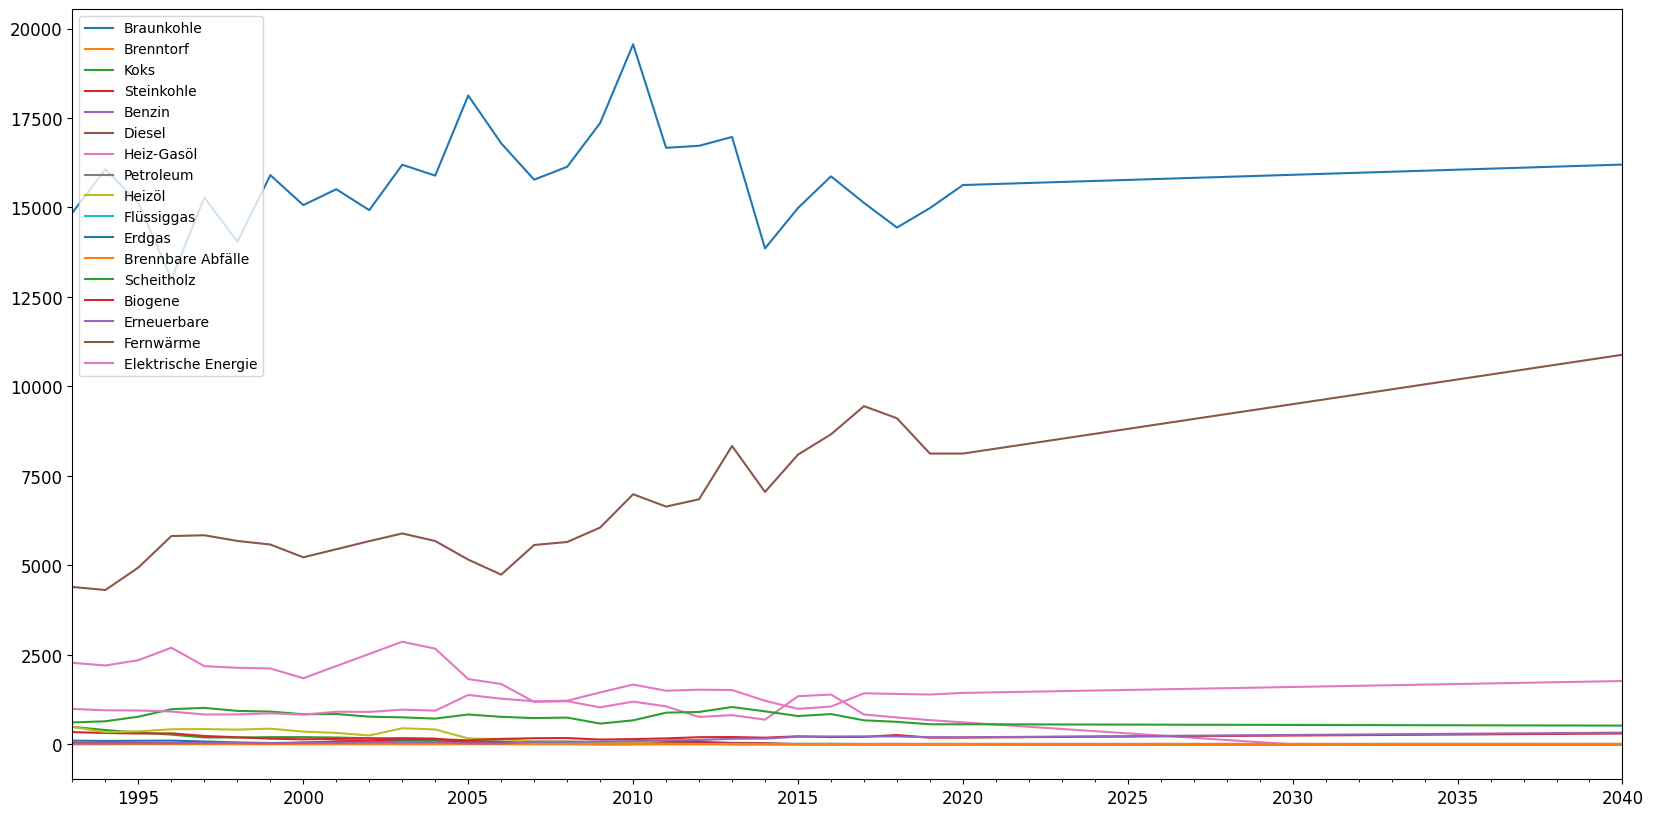

In [61]:
import matplotlib

matplotlib.rcParams["figure.figsize"] = (20,10)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#nea_data['wien']['Wohngebäude']['Heizen']
heizen_ph_wien = nea_data['wien']['Wohngebäude']['Heizen']
heizen_ph_wien_ex = extrapolation_extension.run(heizen_ph_wien, pd.PeriodIndex(pd.period_range(start=heizen_ph_wien.index[0], end='2040', freq='A'), name=heizen_ph_wien.index.name))
heizen_ph_wien_ex = clean_negative_values(heizen_ph_wien_ex)

heizen_ph_wien_ex.plot()

#clean_negative_values(heizen_ph_wien_ex.sum).plot()
#heizen_ph_wien


#szenario
# wien 2040 -> 0 gas
# 2035 -> 0 oel
# 2030 -> 0 kohle

#fernwaerme, strom, umweltwaereme -> 1,2,3% steigung
#scheitholz bleibt gleich
#wie entwickeln sich die anderen?
#individuell pro bundesland
#gesamtergebnis fuer oesterreich


In [65]:
eb_dict_data.keys()

dict_keys([GLand(name='burgenland'), GLand(name='kaernten'), GLand(name='niederoesterreich'), GLand(name='oberoesterreich'), GLand(name='salzburg'), GLand(name='steiermark'), GLand(name='tirol'), GLand(name='vorarlberg'), GLand(name='wien')])

<Axes: >

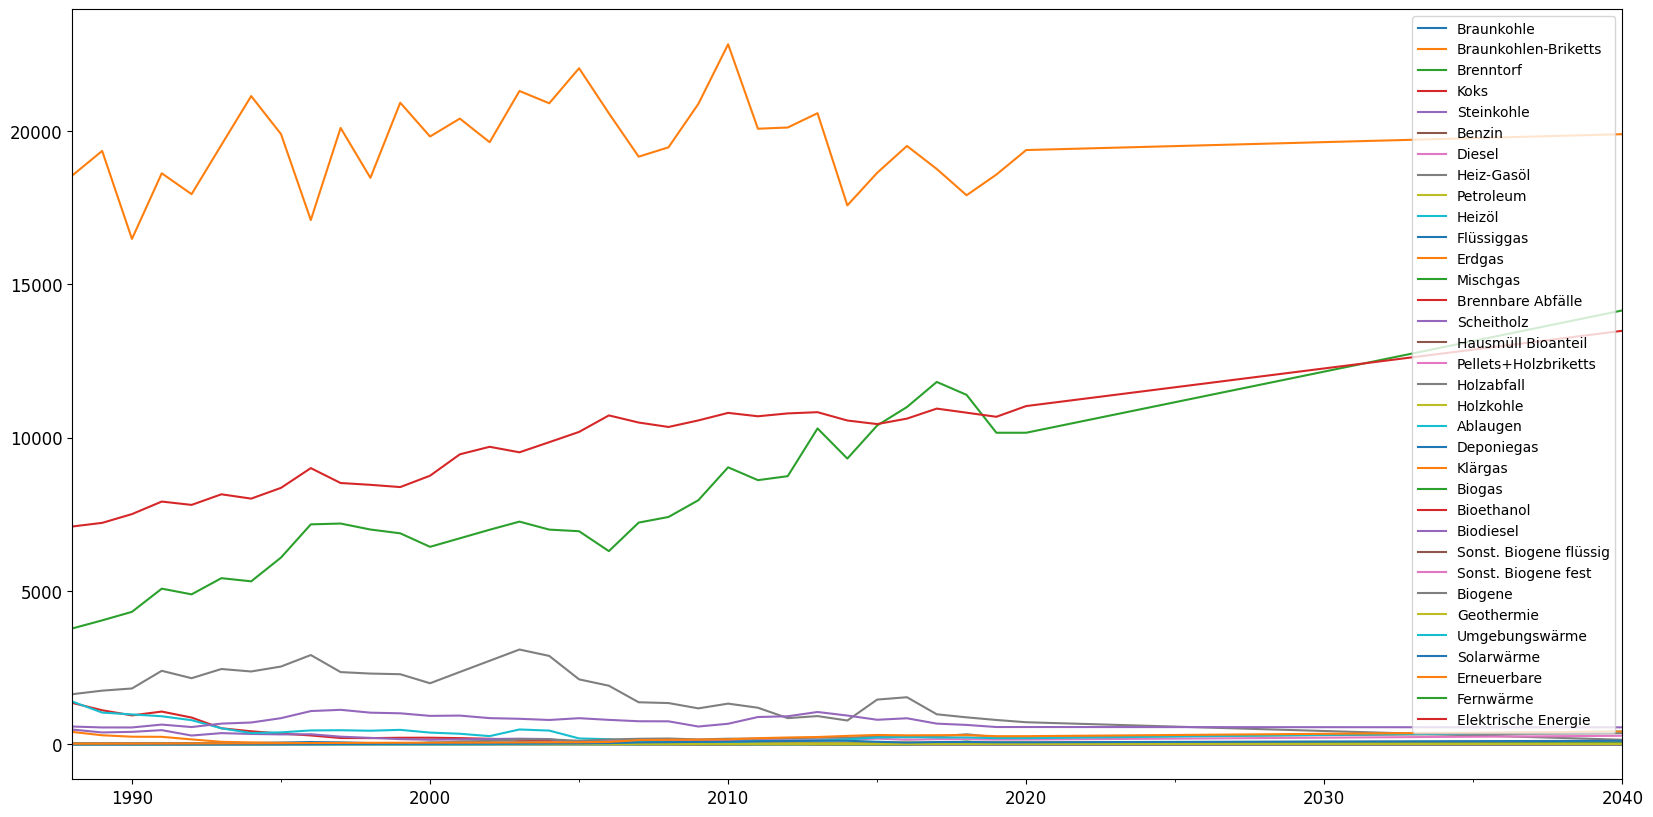

In [70]:
eb_heizen_ph_wien = eb_data['wien']['Wohngebäude']
eb_heizen_ph_wien_ex = extrapolation_extension.run(eb_heizen_ph_wien, pd.PeriodIndex(pd.period_range(start=eb_heizen_ph_wien.index[0], end='2040', freq='A'), name=eb_heizen_ph_wien.index.name))
eb_heizen_ph_wien_ex = clean_negative_values(eb_heizen_ph_wien_ex)

eb_heizen_ph_wien_ex.plot()